In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pywt.data

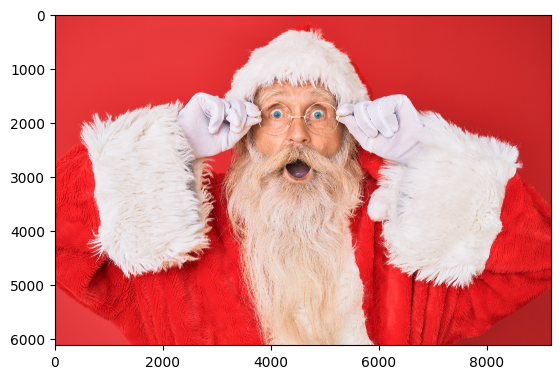

In [41]:
img = cv2.imread('images_exam/krakenimages-liT5AlTmC8I-unsplash.jpg')

rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

In [42]:
img.shape[1] / img.shape[0]

1.5

In [43]:
h, w, c = rgb.shape
new_width = 4591

k = float(w)/h
dim = (new_width, int(new_width / k))

rgb = cv2.resize(rgb, dim, interpolation=cv2.INTER_AREA)
rgb.shape[0]


3060

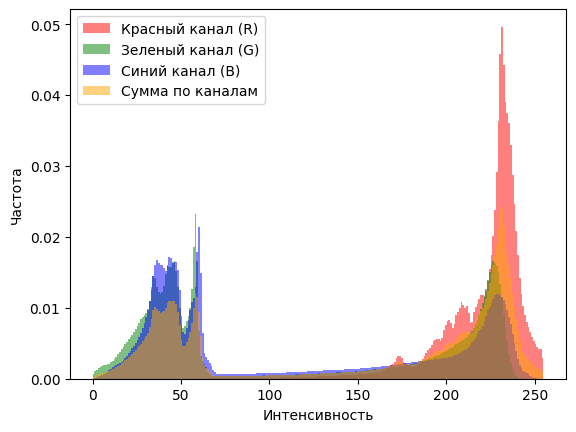

In [44]:
plt.hist(rgb[:, :, 0].ravel(), bins = 256, color = 'Red', alpha = 0.5, density=True)
plt.hist(rgb[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5, density=True)
plt.hist(rgb[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5, density=True)
plt.hist(rgb.ravel(), bins = 256, color = 'orange', alpha = 0.5, density=True)
plt.legend(['Красный канал (R)', 'Зеленый канал (G)', 'Cиний канал (B)', 'Сумма по каналам'])
plt.xlabel('Интенсивность')
plt.ylabel('Частота')
plt.show()

np.float64(0.04963875155613316)

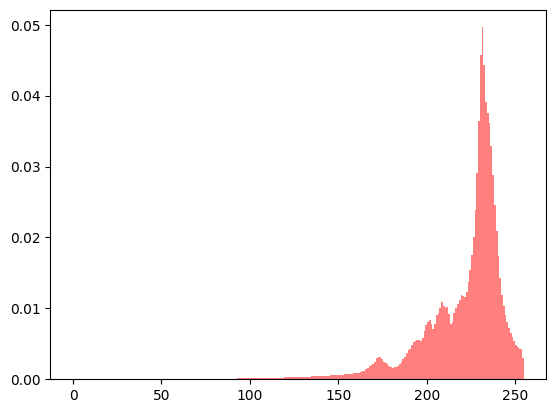

In [45]:
np.max(plt.hist(rgb[:, :, 0].ravel(), bins = 256, color = 'Red', alpha = 0.5, density=True)[0])
     

In [46]:
rgb_new = rgb.copy()

In [47]:
rgb_new[:, :, 0] = (rgb_new[:, :, 0] - np.min(rgb_new[:, :, 0]))/(np.max(rgb_new[:, :, 0]) - np.min(rgb_new[:, :, 0]))*255
rgb_new[:, :, 1] = (rgb_new[:, :, 1] - np.min(rgb_new[:, :, 1]))/(np.max(rgb_new[:, :, 1]) - np.min(rgb_new[:, :, 1]))*255
rgb_new[:, :, 2] = (rgb_new[:, :, 2] - np.min(rgb_new[:, :, 2]))/(np.max(rgb_new[:, :, 2]) - np.min(rgb_new[:, :, 2]))*255
     

In [48]:
rgb_new[1528][2308]

array([212, 144, 123], dtype=uint8)

In [49]:

# img_grey = cv2.cvtColor(rgb_new, cv2.COLOR_BGR2GRAY)
# plt.imshow(img_grey,cmap='gray');

In [50]:
wavelet = 'haar'
c = pywt.dwt2(rgb_new, wavelet)
cA, (cH, cV, cD) = c

In [51]:
cA1, (cH1, cV1, cD1) = pywt.dwt2(cA, wavelet)

In [52]:
th = 90
cA1[np.abs(cA1) < th] = 0

In [53]:
np.count_nonzero(cA1 == 0)

1469